In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import pyarrow
from datetime import datetime

from meteostat import Point, Daily, Stations, Monthly
pd.set_option('display.max_columns', None)

#https://meteostat.net/en/blog/obtain-weather-data-any-location-python

# Quick things Cornelia and Alberto asked for

In [72]:
joined = pd.read_parquet('joined_open_schools_only_10-10-22.parquet', engine='pyarrow')

In [25]:
joined.head()

,year,cdscode,school_county,school_zip,school_open_date,school_closed_date,school_lat,school_lon,school_wspd,school_elevation_m,year_month,total_population,total_population_male,total_population_female,population_0_4,population_0_4_male,population_0_4_female,population_5_9,population_5_9_male,population_5_9_female,population_10_14,population_10_14_male,population_10_14_female,population_15_19,population_15_19_male,population_15_19_female,pop_under19_male,pop_under19_female,total_pop_under19,pm25,point_source_lat,point_source_lon,ps_elevation_m,point_source_pm25_tpy,dist_school_to_ps_m,angle_to_school,ps_wind_lat,ps_wind_lon,ps_wspd_merge,school_wdir_wrt_0N,ps_wdir_wrt_0N,school_wind_alignment,ps_wind_alignment,avg_wind_speed,avg_wind_alignment,avg_wind_alignment_cosine,new_year,open_close_dates_valid,Taxable Year,Zip Code,CA_AGI_per_returns,Total Tax Liability,school_county_v2,school_region_name,nearby_point_source_count,open_dates_valid
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2010.0,20102070109728,Madera,93610,2005-08-16,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
1,2010.0,20102072030187,Madera,93610,2001-01-22,2014-06-30,37.115210,-120.266030,1.531352,70.84,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,1873.525780181077,-55.29643968357893,NaN,NaN,1.531352,102.528057,102.528057,157.824497,157.824497,1.531352,157.824497,0.073968,2010-01-01,1,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1
2,2010.0,20651930000000,Madera,93610,1990-01-01,2025-01-01,37.122449,-120.264870,1.531352,72.77,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2358.38241919395,-37.54028477906731,NaN,NaN,1.531352,102.528057,102.528057,140.068342,140.068342,1.531352,140.068342,0.233189,2010-01-01,0,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
3,2010.0,20651930113076,Madera,93610,2007-08-21,2025-01-01,37.131113,-120.242025,1.531352,77.12,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2892.9075458251764,11.831222108044384,NaN,NaN,1.531352,102.528057,102.528057,90.696835,90.696835,1.531352,90.696835,0.987838,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,0.0,1
4,2010.0,20651936023907,Madera,93610,1980-07-01,2025-01-01,37.115243,-120.267770,1.531352,70.66,2010-04-01,23833.0,8280.0,15553.0,1439.0,694.0,745.0,1485.0,729.0,756.0,1407.0,740.0,667.0,1473.0,753.0,720.0,2916.0,2888.0,5804.0,7.736047,37.1056,-120.2487,73.3,2.0127727,2004.5665433091058,-57.72695665034661,NaN,NaN,1.531352,102.528057,102.528057,160.255014,160.255014,1.531352,160.255014,0.058794,2010-01-01,2,2010.0,93610,14375.028223,2905021.0,Madera,Northern San Joaquin Valley,1.0,1


In [53]:
year_months = joined['year_month'].unique()

In [54]:
year_months = pd.DataFrame(year_months)

In [58]:
year_months.rename(columns={0: "year_month_DT"}, inplace=True)

In [59]:
year_months.dtypes

year_month_DT    datetime64[ns]
dtype: object

In [64]:

def truncate(year_month_DT):
    new = str(year_month_DT)[5:7]
    return new

year_months['month_STR'] = year_months.apply(lambda row: truncate(row['year_month_DT']), axis = 1)

In [69]:
year_months['year_month_PD']  = pd.to_datetime(year_months['year_month_DT']).dt.to_period('M')

In [73]:
year_months.dtypes

year_month_DT     datetime64[ns]
year_month_STR            object
year_STR                  object
month_STR                 object
year_month_PD          period[M]
dtype: object

In [72]:
year_months.to_csv('unique_year_months.csv')

In [13]:
point_elevations = pd.read_csv('pollution_point_source_elevations.csv', low_memory=False)
school_elevations = pd.read_parquet('school_elevations.parquet', engine='pyarrow')

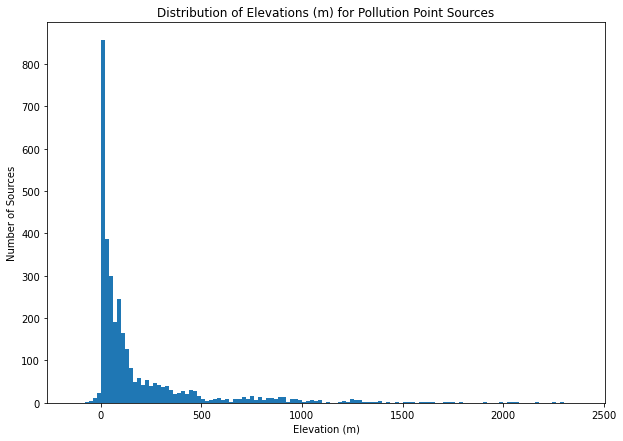

In [22]:
from matplotlib import pyplot as plt
import numpy as np
 
 
# Creating dataset
a = point_elevations['elevation_meters']
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = range(-140, 2400, 20))
plt.title("Distribution of Elevations (m) for Pollution Point Sources")
plt.xlabel("Elevation (m)")
plt.ylabel("Number of Sources")
 
# Show plot
plt.show()

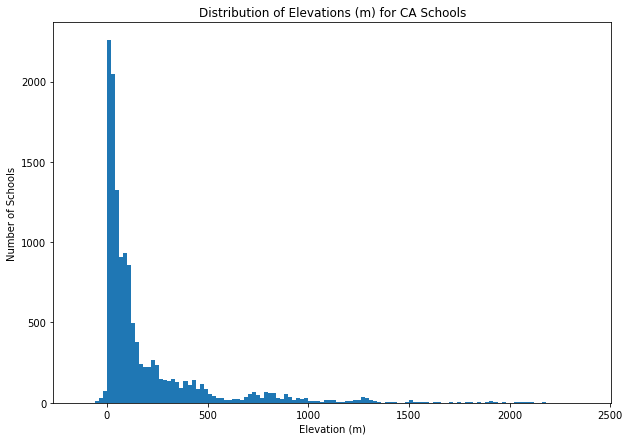

In [23]:
a = school_elevations['elevation_meters']
 
# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(a, bins = range(-140, 2400, 20))
plt.title("Distribution of Elevations (m) for CA Schools")
plt.xlabel("Elevation (m)")
plt.ylabel("Number of Schools")
 
# Show plot
plt.show()

In [18]:
school_elevations.head()


,cdscode,school_lat,school_lon,elevation_meters
0,20102070109728,37.115210,-120.26603,70.84
1,20102072030187,37.115210,-120.26603,70.84
2,20651930000000,37.122449,-120.26487,72.77
3,20651930113076,37.131113,-120.242025,77.12
4,20651936023907,37.115243,-120.26777,70.66


In [14]:
school_elevations.to_csv('school_elevations.csv')

# Get point source and school zips

In [130]:
zip_code_subset_schools = joined[["school_lat", "school_lon", 'school_zip']]
zip_code_subset_point_sources = joined[['point_source_lat', 'point_source_lon']]
zip_code_subset_point_sources['point_source_lat'] = zip_code_subset_point_sources['point_source_lat'].astype(float)
zip_code_subset_point_sources['point_source_lon'] = zip_code_subset_point_sources['point_source_lon'].astype(float)

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [131]:
zip_code_subset_schools.drop_duplicates(inplace=True)
zip_code_subset_point_sources.drop_duplicates(inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [132]:
zip_code_subset_schools.shape[0]

10779

In [133]:
zip_code_subset_point_sources.shape[0]

3287

In [134]:
zip_code_subset_point_sources

,point_source_lat,point_source_lon
index,,
0,37.105600,-120.248700
8,35.151250,-118.016670
12,35.513841,-118.901299
16,35.576700,-119.785400
19,34.534084,-117.861722
...,...,...
499196,34.256000,-118.420000
554961,37.754880,-122.405500
608035,39.808918,-121.884611


In [172]:
point_sources_with_zips_og = pd.read_csv('pollution_point_sources.csv', low_memory=False)

In [183]:
point_sources_with_zips_og.head()

,Unnamed: 0,checked_lat,checked_lon,zip_code,report_year,PM25_emissions_TPY,new_zip,combo_zip
0,0,33.811466,-117.915550,92803.0,2002,1.787854,92802,92803.0
1,1,34.088242,-117.470116,92335.0,2002,1.789200,92335,92335.0
2,2,33.911602,-118.281799,93420.0,2002,1.791300,90061,93420.0
3,3,37.944618,-121.325859,95203.0,2002,1.797500,95203,95203.0
4,4,39.221817,-121.054955,95945.0,2002,1.801540,95945,95945.0


In [174]:
point_sources_with_zips_og['zip_code'].value_counts()

0.0        645
94565.0     68
93308.0     59
94553.0     57
95776.0     52
          ... 
91504.0      1
90064.0      1
90747.0      1
95403.0      1
92277.0      1
Name: zip_code, Length: 831, dtype: int64

In [175]:
point_sources_with_zips_og['combo_zip'].value_counts()

0.0        150
94565.0     68
93308.0     64
94553.0     58
95776.0     52
          ... 
91748.0      1
91504.0      1
90064.0      1
90747.0      1
92277.0      1
Name: combo_zip, Length: 885, dtype: int64

In [179]:
point_sources_with_zips_og[point_sources_with_zips_og['combo_zip']==94565.0]

,Unnamed: 0,checked_lat,checked_lon,zip_code,report_year,PM25_emissions_TPY,new_zip,combo_zip
382,382,38.012733,-121.864891,94565.0,2002,4.574982,94565,94565.0
588,588,38.029415,-121.943321,94565.0,2002,8.853892,0,94565.0
593,593,38.032215,-121.875832,94565.0,2002,9.081791,94565,94565.0
614,614,38.019123,-121.941193,94565.0,2002,9.749060,94565,94565.0
702,702,38.047104,-121.986832,94565.0,2002,14.800339,0,94565.0
...,...,...,...,...,...,...,...,...
6918,6918,38.024120,-121.854620,94565.0,2017,9.118270,94565,94565.0
6970,6970,38.022840,-121.860340,94565.0,2017,11.333776,94565,94565.0
6988,6988,37.993998,-121.935153,94565.0,2017,12.361297,94521,94565.0
7047,7047,38.029800,-121.872700,94565.0,2017,19.016055,94565,94565.0


In [136]:
point_sources_with_zips.drop(columns=['Unnamed: 0', 'zip_code', 'report_year', 'PM25_emissions_TPY', 'new_zip'], inplace=True)

In [137]:
point_sources_with_zips.rename(columns={'checked_lat': 'point_source_lat', 'checked_lon': 'point_source_lon'}, inplace=True)

In [ ]:
def lat_lon(lat, lon):
    x = str(lat) + '_' + str(lon)
    return x

zip_code_subset_point_sources['lat_lon'] = ear_months.apply(lambda row: truncate(row['year_month_DT']), axis = 1)
point_sources_with_zips['lat_lon']

In [180]:
zip_code_subset_point_sources.head()

,point_source_lat,point_source_lon
index,,
0,37.105600,-120.248700
8,35.151250,-118.016670
12,35.513841,-118.901299
16,35.576700,-119.785400
19,34.534084,-117.861722


In [181]:
ps_zips = pd.merge(zip_code_subset_point_sources, point_sources_with_zips, how='left', on=['point_source_lat', 'point_source_lon'])

In [171]:
#zip_code_subset_point_sources.value_counts(['point_source_lat', 'point_source_lon'], ascending=False)
point_sources_with_zips.value_counts(['point_source_lat', 'point_source_lon'], ascending=False)

point_source_lat  point_source_lon
33.702904         -117.760925         7
33.844989         -117.510864         6
37.645859         -121.001991         5
37.957489         -121.288017         5
39.251400         -123.199270         5
                                     ..
35.353803         -118.959623         1
35.354017         -119.228099         1
35.370620         -118.979409         1
35.374227         -118.977804         1
41.858755         -123.400844         1
Length: 4086, dtype: int64

In [161]:
point_sources_with_zips.head()

,point_source_lat,point_source_lon,combo_zip
0,33.811466,-117.915550,92803.0
1,34.088242,-117.470116,92335.0
2,33.911602,-118.281799,93420.0
3,37.944618,-121.325859,95203.0
4,39.221817,-121.054955,95945.0


In [156]:
zip_code_subset_point_sources.dtypes

point_source_lat    float64
point_source_lon    float64
dtype: object

In [166]:
ps_zips.shape[0]

5921

In [153]:
ps_zips.drop_duplicates(inplace=True)
ps_zips.shape[0]

3355

In [158]:
ps_zips.head()

,point_source_lat,point_source_lon,combo_zip
0,37.105600,-120.248700,0.0
2,37.105600,-120.248700,93610.0
3,35.151250,-118.016670,0.0
4,35.513841,-118.901299,0.0
7,35.576700,-119.785400,0.0


In [159]:
ps_zips2 = ps_zips[ps_zips['combo_zip'] > 0]
ps_zips2.shape[0]

3320

,school_lat,school_lon,school_zip,point_source_lat,point_source_lon,checked_lat,checked_lon,combo_zip
0,37.115210,-120.266030,93610,37.105600,-120.248700,37.105600,-120.248700,0.0
2,37.115210,-120.266030,93610,37.105600,-120.248700,37.105600,-120.248700,93610.0
3,37.122449,-120.264870,93610,37.105600,-120.248700,37.105600,-120.248700,0.0
5,37.122449,-120.264870,93610,37.105600,-120.248700,37.105600,-120.248700,93610.0
6,37.131113,-120.242025,93610,37.105600,-120.248700,37.105600,-120.248700,0.0
...,...,...,...,...,...,...,...,...
75103,35.863125,-120.801270,93426,35.951530,-120.857760,35.951530,-120.857760,93450.0
75107,37.510300,-122.335400,94402,37.491398,-122.387897,37.491398,-122.387897,94019.0
75109,39.758522,-121.858380,95926,39.800700,-121.864000,39.800700,-121.864000,95973.0
75112,37.754947,-122.418690,94110,37.754880,-122.405500,37.754880,-122.405500,94110.0


# Temperature testing

In [2]:
point_elevations = pd.read_csv('pollution_point_source_elevations.csv', low_memory=False)
school_elevations = pd.read_parquet('school_elevations.parquet', engine='pyarrow')

In [184]:
#Set time period
start = datetime(2000, 1, 1)
end = datetime(2018, 12, 31)

#
#point = Point(37.105600,-120.248700,73.30)

# 3
point = Point(35.576700, -119.785400, 175.10)

# Get Monthly data
data = Monthly(point, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun


In [86]:
data = data.reset_index(drop=False)
data.empty

False

In [85]:
# Get Monthly data
point = Point(37.105600,-120.248700,73.30)
data = Monthly(point, start, end)
data = data.fetch()
data

,tavg,tmin,tmax,prcp,wspd,pres,tsun
time,,,,,,,
2006-02-01,9.9,3.8,16.9,NaN,NaN,NaN,NaN
2006-03-01,9.5,4.4,14.7,NaN,NaN,NaN,NaN
2006-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-05-01,20.6,12.2,29.0,NaN,11.6,1013.2,NaN
2006-06-01,25.3,16.2,34.2,NaN,NaN,1012.1,NaN
...,...,...,...,...,...,...,...
2018-07-01,28.3,19.3,37.4,0.0,13.0,1012.4,NaN
2018-08-01,24.7,15.7,33.9,0.0,NaN,1012.1,NaN
2018-09-01,24.0,14.4,34.3,0.0,9.0,1011.1,NaN


# Retrieve temperatures

In [186]:
def get_temp(lat, lon, elevation):
    new_df_dict = {}
    year_start = 2000
    year_end = 2018
    month_start = 1
    month_end = 12
    lat = lat
    lon = lon
    elevation = elevation
    start = datetime(year_start, month_start, 31)
    end = datetime(year_end, month_end, 31)
    combo_key = str(lat)+'_'+str(lon)+'_'+str(elevation)
    
    point = Point(lat, lon, elevation)
    month = Monthly(point, start, end)
    table = month.fetch()
    try:
        data = table.reset_index(drop=False)
    except: 
        print("first clause failure")

    # if nothing fetched, make df with nan for time and temp
    if data.empty:
        df_time = np.nan
        df_tavg = np.nan
        df_lat_r = pd.Series([lat])
        df_lon_r = pd.Series([lon])
        df_elevation_r = pd.Series([elevation])
        new_df = pd.DataFrame.from_dict({'lat': df_lat_r, 'lon': df_lon_r, 'elevation': df_elevation_r, 'time': df_time, 'avg_temp': df_tavg})
        
    # if something fetched, make df 
    else:
        df_tavg = data['tavg']
        df_time = data['time']

        # create repeated records for lat/lon/elevation
        df_lat = pd.Series([lat])
        df_lat_r = df_lat.repeat(df_time.shape[0]).reset_index(drop=True)

        df_lon = pd.Series([lon])
        df_lon_r = df_lon.repeat(df_time.shape[0]).reset_index(drop=True)

        df_elevation = pd.Series([elevation])
        df_elevation_r = df_elevation.repeat(df_time.shape[0]).reset_index(drop=True)
        new_df = pd.DataFrame.from_dict({'lat': df_lat_r, 'lon': df_lon_r, 'elevation': df_elevation_r, 'time': df_time, 'avg_temp': df_tavg})

    # add the df to lat_lon_elevation combo key
    new_df_dict[combo_key] = new_df

    list_concat = [pd.DataFrame(i) for i in new_df_dict.values()]
    final_df = pd.concat(list_concat)

    return final_df
    

In [187]:
point_elevations.shape[0]

3330

In [5]:
point_elevations_test = point_elevations

In [6]:
point_elevations_test

,point_source_lat,point_source_lon,elevation_meters
0,37.105600,-120.248700,73.30
1,35.151250,-118.016670,740.08
2,35.513841,-118.901299,250.90
3,35.576700,-119.785400,175.10
4,34.534084,-117.861722,900.09


# Point Pollution sources lookup table generations

In [189]:
point_elevations.drop(index=3329, inplace=True)

In [190]:
point_elevations

,point_source_lat,point_source_lon,elevation_meters
0,37.105600,-120.248700,73.30
1,35.151250,-118.016670,740.08
2,35.513841,-118.901299,250.90
3,35.576700,-119.785400,175.10
4,34.534084,-117.861722,900.09
...,...,...,...
3324,37.672956,-121.830548,116.66
3325,34.139927,-117.380928,444.26
3326,34.096066,-117.383461,371.05
3327,34.059898,-117.281700,307.80


In [191]:
testing_new_df = point_elevations.apply(lambda row: get_temp(row['point_source_lat'], 
                                                                  row['point_source_lon'], 
                                                                  row['elevation_meters']), axis=1)

In [192]:
# Postprocessing
list_dfs = list(testing_new_df)
point_dataset = pd.concat(list_dfs)

In [193]:
point_dataset

,lat,lon,elevation,time,avg_temp
0,37.105600,-120.248700,73.30,2006-02-01,9.9
1,37.105600,-120.248700,73.30,2006-03-01,9.5
2,37.105600,-120.248700,73.30,2006-04-01,NaN
3,37.105600,-120.248700,73.30,2006-05-01,20.6
4,37.105600,-120.248700,73.30,2006-06-01,25.3
...,...,...,...,...,...
63,35.030251,-118.316452,1099.54,2016-10-01,NaN
64,35.030251,-118.316452,1099.54,2016-11-01,NaN
65,35.030251,-118.316452,1099.54,2016-12-01,NaN
66,35.030251,-118.316452,1099.54,2017-01-01,NaN


In [194]:
point_dataset[point_dataset['avg_temp'].isnull()]


,lat,lon,elevation,time,avg_temp
2,37.105600,-120.248700,73.30,2006-04-01,NaN
9,37.105600,-120.248700,73.30,2006-11-01,NaN
10,37.105600,-120.248700,73.30,2006-12-01,NaN
13,37.105600,-120.248700,73.30,2007-03-01,NaN
14,37.105600,-120.248700,73.30,2007-04-01,NaN
...,...,...,...,...,...
62,35.030251,-118.316452,1099.54,2016-09-01,NaN
63,35.030251,-118.316452,1099.54,2016-10-01,NaN
64,35.030251,-118.316452,1099.54,2016-11-01,NaN
65,35.030251,-118.316452,1099.54,2016-12-01,NaN


In [195]:
point_dataset.rename(columns={'lat': 'point_source_lat', 'lon': 'point_source_lon', 'elevation': 'elevation_meters'}, inplace=True)

In [199]:
# started adding zip codes but stopped bc we don't need them

# ps_zips2.rename(columns={'combo_zip': 'point_source_zipcode'}, inplace=True)
# ps_zips2.head()

In [198]:
# point_dataset_zips = pd.merge(point_dataset, ps_zips2, how='left', left_on=['point_source_lat', 'point_source_lon'], right_on=['point_source_lat', 'point_source_lon'])

In [197]:
# point_dataset_zips

In [196]:
point_dataset.to_parquet("point_poll_sources_temp_lookup.parquet")

# Schools temp lookup table generation

In [52]:
school_elevations.head()

,cdscode,school_lat,school_lon,elevation_meters
0,20102070109728,37.115210,-120.26603,70.84
1,20102072030187,37.115210,-120.26603,70.84
2,20651930000000,37.122449,-120.26487,72.77
3,20651930113076,37.131113,-120.242025,77.12
4,20651936023907,37.115243,-120.26777,70.66


In [57]:
school_elevations.dtypes

cdscode              object
school_lat          float64
school_lon          float64
elevation_meters    float64
dtype: object

In [55]:
point_elevations.dtypes

point_source_lat    float64
point_source_lon    float64
elevation_meters    float64
dtype: object

In [56]:
school_elevations['school_lat'] = school_elevations['school_lat'].astype(float)
school_elevations['school_lon'] = school_elevations['school_lon'].astype(float)

In [58]:
schools = school_elevations.apply(lambda row: get_temp(row['school_lat'], 
                                                                  row['school_lon'], 
                                                                  row['elevation_meters']), axis=1)

In [59]:
# Postprocessing
list_dfs_schools = list(schools)
schools_dataset = pd.concat(list_dfs_schools)

In [64]:
schools_dataset.rename(columns={'lat': 'school_lat', 'lon': 'school_lon', 'elevation': 'elevation_meters'}, inplace=True)

In [71]:
schools_dataset.shape[0]

2484094

In [70]:
schools_dataset[schools_dataset['avg_temp'].isnull()]

,school_lat,school_lon,elevation_meters,time,avg_temp
2,37.115210,-120.26603,70.84,2006-04-01,NaN
9,37.115210,-120.26603,70.84,2006-11-01,NaN
10,37.115210,-120.26603,70.84,2006-12-01,NaN
13,37.115210,-120.26603,70.84,2007-03-01,NaN
14,37.115210,-120.26603,70.84,2007-04-01,NaN
...,...,...,...,...,...
98,37.899876,-122.03226,84.20,2008-03-01,NaN
107,37.899876,-122.03226,84.20,2008-12-01,NaN
110,37.899876,-122.03226,84.20,2009-03-01,NaN
119,37.899876,-122.03226,84.20,2009-12-01,NaN


In [66]:
schools_dataset.to_parquet("schools_temp_lookup.parquet")